### Regresion Lineal

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
import pickle
import os


### Leemos el Dataset

In [35]:
df= pd.read_csv("../data/raw/medical_insurance_cost.csv")

### Tamaño del Dataset

In [36]:
df.shape

(1338, 7)

### Primeras filas

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Ultimas filas del dataset

In [38]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Evaluacion de datos y verificacion de nulos

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Estadisticas descriptivas de variables numericas

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Estadistica descriptiva de variables categoricas 

In [42]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


### Distribucion de variables categoricas.

In [43]:
for col in df.select_dtypes(include='object').columns:
    print(f"Variable: {col}")
    print(df[col].value_counts())
    print("\n")

Variable: sex
sex
male      676
female    662
Name: count, dtype: int64


Variable: smoker
smoker
no     1064
yes     274
Name: count, dtype: int64


Variable: region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




### Conversion de Categoricas a Númericas
>
> Lo hacemos de dos formas (pd.get_dummies) and (pd.factorize)

In [44]:
df_numerico = pd.get_dummies(df, drop_first=True)
df_numerico.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [45]:
df_numerico = df_numerico.astype(int)

In [46]:
df_fac = df_numerico.copy()
df_fac['region'] = pd.factorize(df['region'])[0]
df_fac['smoker'] = pd.factorize(df['smoker'])[0]
df_fac['sex'] = pd.factorize(df['sex'])[0]
df_fac


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,region,smoker,sex
0,19,27,0,16884,0,1,0,0,1,0,0,0
1,18,33,1,1725,1,0,0,1,0,1,1,1
2,28,33,3,4449,1,0,0,1,0,1,1,1
3,33,22,0,21984,1,0,1,0,0,2,1,1
4,32,28,0,3866,1,0,1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0,2,1,1
1334,18,31,0,2205,0,0,0,0,0,3,1,0
1335,18,36,0,1629,0,0,0,1,0,1,1,0
1336,21,25,0,2007,0,0,0,0,1,0,1,0


### Heatmap de variables numericas

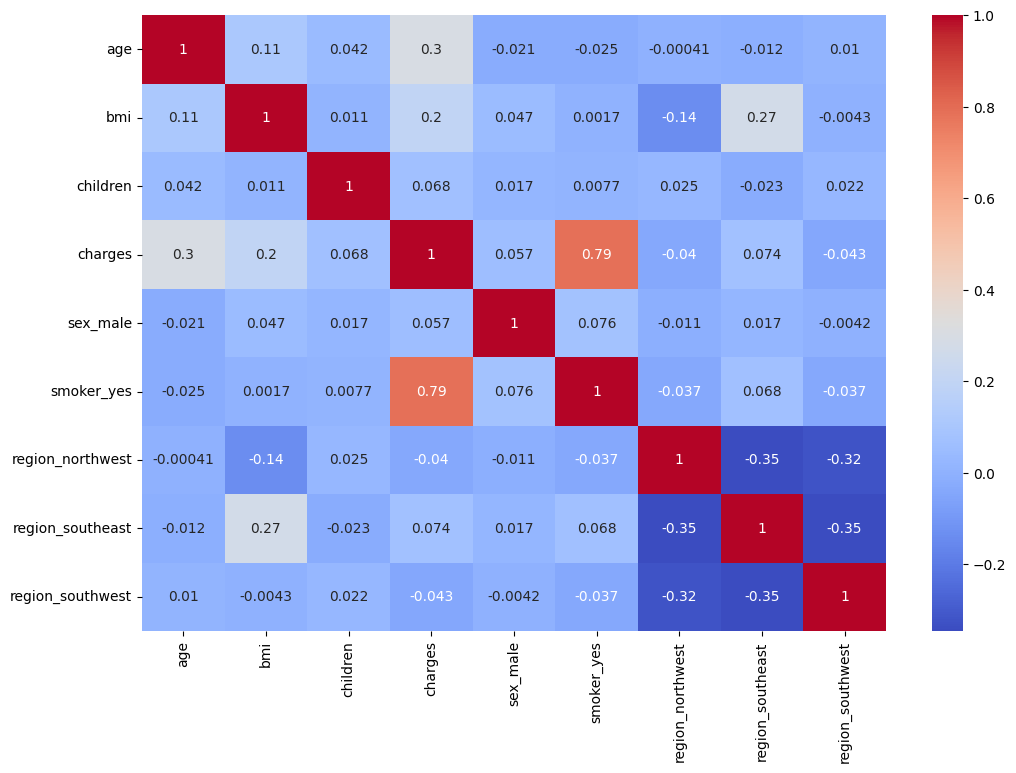

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.show()

### Visualizacion de smoker - BMI - 

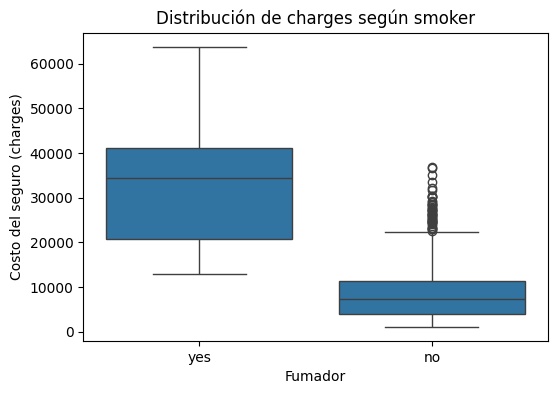

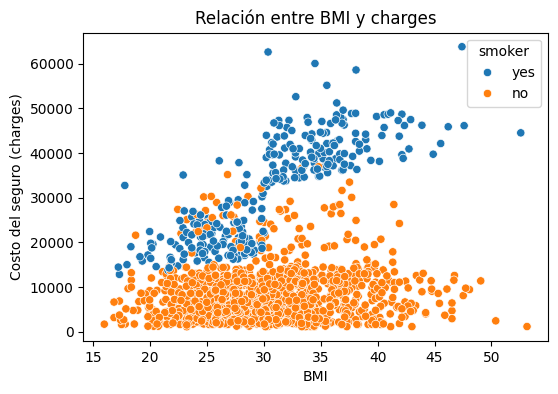

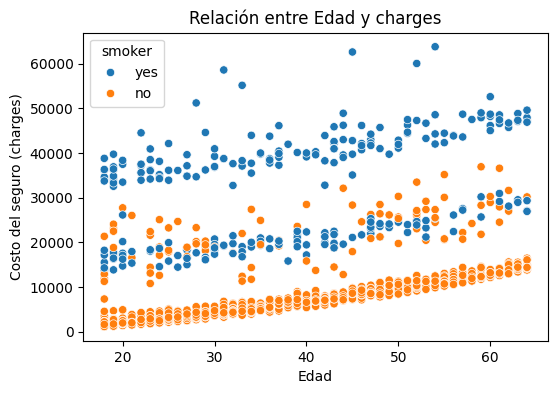

In [51]:
# Gráfico 1: smoker vs charges (target)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Distribución de charges según smoker')
plt.xlabel('Fumador')
plt.ylabel('Costo del seguro (charges)')
plt.show()

# Gráfico 2: bmi vs charges (target)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Relación entre BMI y charges')
plt.xlabel('BMI')
plt.ylabel('Costo del seguro (charges)')
plt.show()

# Gráfico 3: age vs charges (target)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Relación entre Edad y charges')
plt.xlabel('Edad')
plt.ylabel('Costo del seguro (charges)')
plt.show()

### Definicion de variables predictoras

In [52]:
# Definición de variables predictoras (X) y variable objetivo (y)
# Usamos el DataFrame numérico ya preparado

X = df_numerico.drop('charges', axis=1)  # Variables predictoras
y = df_numerico['charges']               # Variable objetivo (target)

X.head(), y.head()

(   age  bmi  children  sex_male  smoker_yes  region_northwest  \
 0   19   27         0         0           1                 0   
 1   18   33         1         1           0                 0   
 2   28   33         3         1           0                 0   
 3   33   22         0         1           0                 1   
 4   32   28         0         1           0                 1   
 
    region_southeast  region_southwest  
 0                 0                 1  
 1                 1                 0  
 2                 1                 0  
 3                 0                 0  
 4                 0                 0  ,
 0    16884
 1     1725
 2     4449
 3    21984
 4     3866
 Name: charges, dtype: int64)

### Division de los datos para el entrenamiento y prueba

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# con esto verificamos que todo es numerico
X_train.dtypes 

age                 int64
bmi                 int64
children            int64
sex_male            int64
smoker_yes          int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object

### Modelo de regresion lineal

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluacion de modelo

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', root_mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7837888448800693
MSE: 5793.655127404497
RMSE: 5793.655127404497


### Grabar el metodo_csv

In [64]:
# Guardar el DataFrame numérico procesado a un archivo CSV
df_numerico.to_csv("../data/processed/medical_insurance_cost_numerico.csv", index=False)

### Prediccion del modelo

In [67]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25,2,0,0,0,0,0
887,36,30,0,0,0,1,0,0
890,64,26,0,0,1,1,0,0
1293,46,25,3,1,0,1,0,0
259,19,31,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
109,63,35,0,1,1,0,1,0
575,58,27,0,0,0,1,0,0
535,38,28,1,1,0,0,0,0
543,54,47,0,0,1,0,1,0


In [68]:
y_test

764      9095
887      5272
890     29330
1293     9301
259     33750
        ...  
109     47055
575     12222
535      6067
543     63770
846      9872
Name: charges, Length: 268, dtype: int64

In [69]:
y_pred = model.predict(X_test)
y_pred

array([ 9087.64215363,  7232.55948323, 36744.39282136,  9390.86060464,
       26835.96961506, 10700.88438873,   176.85511159, 16763.42629132,
        1176.75821394, 11169.05006058, 28141.94818892,  9355.95788892,
        5221.40321606, 38448.8671946 , 40094.17744513, 36935.83914845,
       15154.15405998, 35854.24430695,  9256.40504231, 31345.37256898,
        3720.33899543, 10086.00383365,  2389.24817343,  7018.12055439,
       11443.40843791, 12895.76372111, 14625.6227313 ,  6201.46301286,
        9937.46817478,  2284.12664592,  9180.25612059, 12967.21335176,
        4415.21189286,  3280.78184264,  4616.51137491, 12914.07103691,
        2005.75807266,  8668.775376  , 33415.56094315, 32673.29028852,
        3873.19203608,  4379.17387366, 14024.82770535, 11450.34188499,
        8673.91733215, 12093.78520875,  5238.19686233,  3218.05521838,
       35328.14327403,  9166.62577563, 15884.51962992,  2376.08281379,
       12380.50385494,  1609.23655956, 13396.31680531, 12705.29630435,
      

### Comparando valores

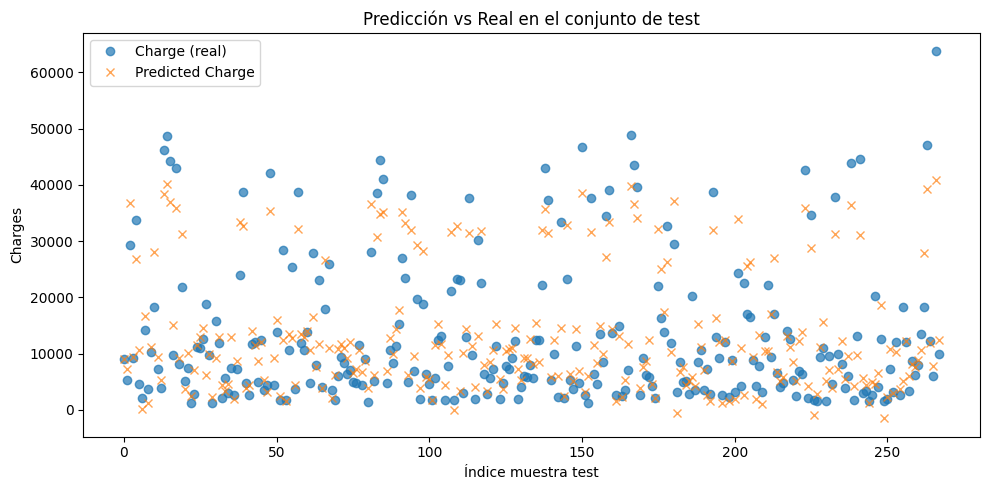

In [70]:
# graficamos la predicción
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test.values, label="Charge (real)", marker='o', linestyle='', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label="Predicted Charge", marker='x', linestyle='', alpha=0.7)
plt.xlabel("Índice muestra test")
plt.ylabel("Charges")
plt.title("Predicción vs Real en el conjunto de test")
plt.legend()
plt.tight_layout()
plt.show()

### Ordenar ambos arrays y comparar

In [71]:
# Ordenar ambos arrays y comparar valores reales vs predichos

# Creamos un DataFrame con los valores reales y predichos
comparacion = pd.DataFrame({'Real': y_test.values, 'Prediccion': y_pred})

# Ordenamos por el valor real
comparacion_ordenada = comparacion.sort_values(by='Real').reset_index(drop=True)

# Mostramos las primeras filas para comparar
comparacion_ordenada.head(10)

,Real,Prediccion
0,1131,2284.126646
1,1146,5976.096424
2,1256,2389.248173
3,1391,3805.219899
4,1534,5069.216950
5,1621,-1518.575144
6,1632,1166.493785
7,1639,2844.661866
8,1674,4319.412304
9,1682,6181.239326


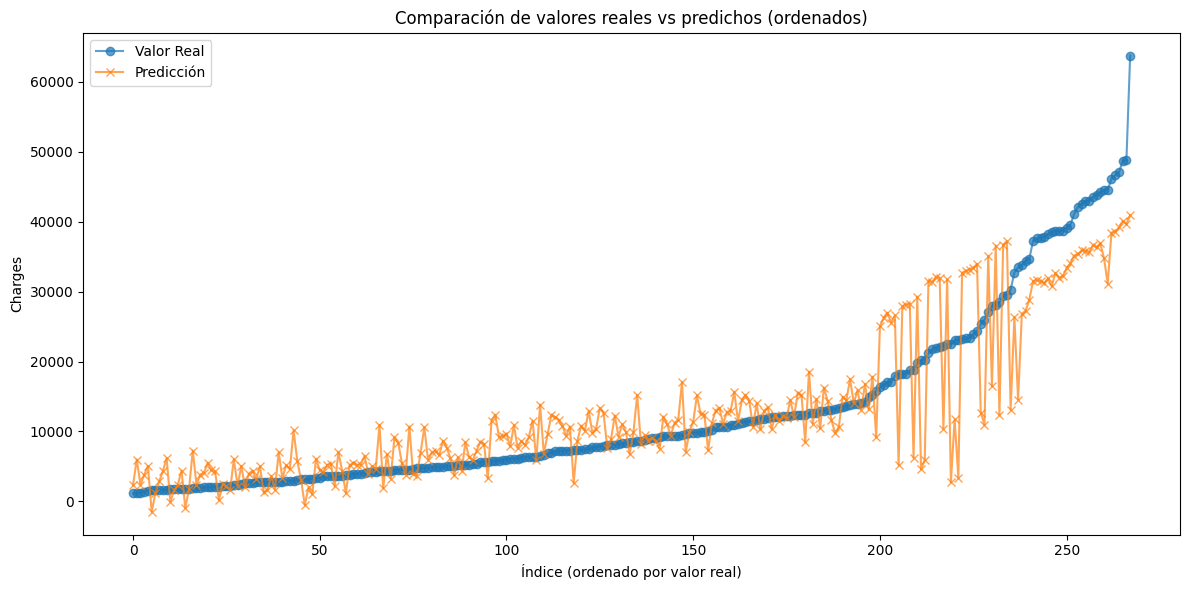

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(comparacion_ordenada['Real'].values, label='Valor Real', marker='o', linestyle='-', alpha=0.7)
plt.plot(comparacion_ordenada['Prediccion'].values, label='Predicción', marker='x', linestyle='-', alpha=0.7)
plt.xlabel('Índice (ordenado por valor real)')
plt.ylabel('Charges')
plt.title('Comparación de valores reales vs predichos (ordenados)')
plt.legend()
plt.tight_layout()
plt.show()

### Guardar el Modelo

In [77]:
# Guardar el modelo entrenado usando pickle en la carpeta models

# Crear la carpeta 'models' si no existe
os.makedirs("../models", exist_ok=True)

# Guardar el modelo
with open("../models/modelo_regresion_lineal.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
# Cargar el modelo guardado con pickle desde la carpeta models
with open("../models/modelo_regresion_lineal.pkl", "rb") as f:
    modelo_cargado = pickle.load(f)